# Yuma County Arizona
Incorporating open data from John Hopkins University, the goal is to create a curve graph for Local Yuma Area.
The focus is for Yuma County, however some code remains for Imperial County.

In [1]:
# Read CSV. One for confirmed cases, the second for deaths.
import pandas as pd
import numpy as np

df = pd.read_csv('time_series_covid19_confirmed_US.csv')
af = pd.read_csv('time_series_covid19_deaths_US.csv')

In [2]:
# (Dead Code) yuma = (df['Admin2'] == 'Yuma') & (df['Province_State'] == 'Arizona')
# Filter to Arizona
az = (df['Province_State'] == 'Arizona') | (df['Admin2'] == 'Imperial')

In [3]:
# Applying Filter to our datasets
df2 = df.loc[az]
af2 = af.loc[az]

In [4]:
df2.rename(columns={'Admin2':'Dates'}, inplace=True)
df2.set_index('Dates', inplace=True)
df2 = df2.T

C:\Users\jmonz\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
af2.rename(columns={'Admin2':'Dates'}, inplace=True)
af2.set_index('Dates', inplace=True)
# We transpose and drop the unneccesary rows
af2 = af2.T

In [6]:
df2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], inplace=True)

In [7]:
af2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], inplace=True)

In [8]:
# Convert to DateTime format
df2['Date'] = df2.index
df2['Date'] = pd.to_datetime(df2['Date'], format= '%m/%d/%y')
df2.set_index('Date', inplace=True)

In [9]:
af2['Date'] = af2.index
af2['Date'] = pd.to_datetime(af2['Date'], format= '%m/%d/%y')
af2.set_index('Date', inplace=True)

In [22]:
# For quick reference to display the head of the document.
# af2
# df2

In [11]:
# Here we filter form April onward...
df2 = df2[df2.index.month >= 4]
af2 = af2[af2.index.month >= 4]
# df2 = df2['2020-3-8':'2020-4-13']
# af2 = af2['2020-3-8':'2020-4-13']

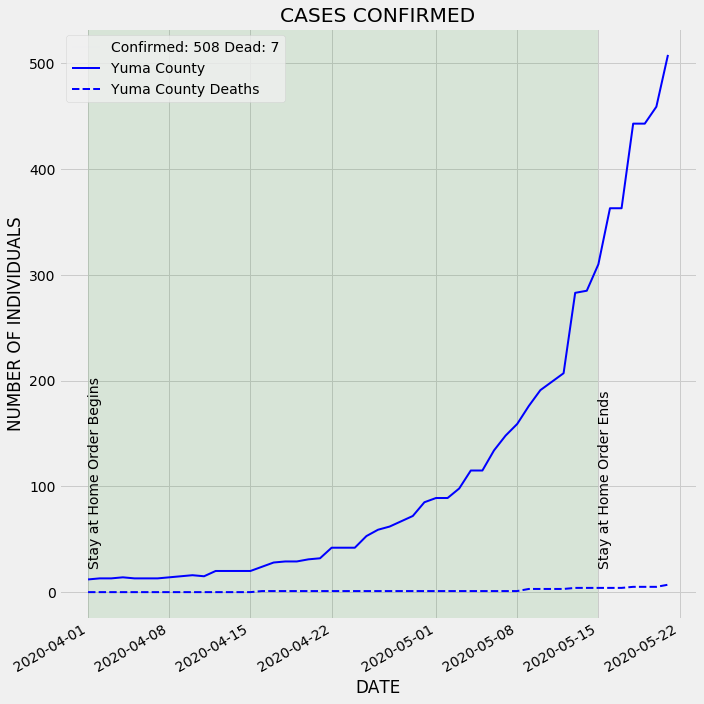

In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add lines
# ax.plot(df2.index.values,
#          df2['Imperial'], color='red', linewidth=2, label='Imperial County')

# ax.plot(af2.index.values,
#         af2['Imperial'], color='red', linestyle='--', linewidth=2, label='Imperial County Deaths')

ax.plot(df2.index.values,
        df2['Yuma'], color='blue', linestyle=':', linewidth=0.01, label='Confirmed: 508 Dead: 7')

ax.plot(df2.index.values,
        df2['Yuma'], color='blue', linewidth=2, label='Yuma County')

ax.plot(af2.index.values,
        af2['Yuma'], color='blue', linestyle='--', linewidth=2, label='Yuma County Deaths')


# Set title and labels for axes
ax.set(xlabel="DATE",
       ylabel="NUMBER OF INDIVIDUALS",
       title="CASES CONFIRMED")
# Stay at home order
a = '2020-04-01'
b = '2020-05-15'
plt.axvspan(a, b, color='g', alpha=0.1, lw=0)

ax.text(a,25,'Stay at Home Order Begins',rotation=90)
ax.text(b,25,'Stay at Home Order Ends',rotation=90)

ax.legend()

fig.autofmt_xdate()

plt.tight_layout()

plt.savefig('Yuma County.png')

plt.show()